In [0]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [0]:
year1 = pd.read_csv('year1.csv', na_values= '?')
year2 = pd.read_csv('year2.csv', na_values= '?')
year3 = pd.read_csv('year3.csv', na_values= '?')
year4 = pd.read_csv('year4.csv', na_values= '?')
year5 = pd.read_csv('year5.csv', na_values= '?')

In [0]:
print(year1.shape)
print(year2.shape)
print(year3.shape)
print(year4.shape)
print(year5.shape)

(7027, 65)
(10173, 65)
(10503, 65)
(9792, 65)
(5910, 65)


In [0]:
data = pd.concat([year1,year2,year3,year4,year5], ignore_index=True)
print(data.shape)

(43405, 65)


In [0]:
print(data.isnull().sum())

param1                       8
param2                       8
param3                       8
param4                     134
param5                      89
retained_earnings            8
EBIT                         8
book_value_of_equity        94
sales                        9
equity                       8
param11                     44
param12                    134
param13                    127
param14                      8
param15                     36
para16                      95
param17                     94
param18                      8
param19                    128
param20                    127
param21                   5854
param22                      8
param23                    127
param24                    922
param25                      8
param26                     95
param27                   2764
param28                    812
logaritm_total_assets        8
param30                    127
                         ...  
param36                      8
param37 

In [0]:
print("Con cero: ",data[data.label == 0].shape[0])
print("Con uno: ",data[data.label == 1].shape[0])

Con cero:  41314
Con uno:  2091


In [0]:
def filter_columnsNan(num_columns, r_Nan, matrix):
  for i, r in matrix.iterrows():
      
      if r.isnull().sum() /num_columns > r_Nan:
          matrix.iloc[i,-1] = 2

  return matrix[data.label != 2]

data = filter_columnsNan(65, 0.05, data)
print()
print(data.shape)
print()
print("Con cero: ",data[data.label == 0].shape[0])
print("Con uno: ",data[data.label == 1].shape[0])


(41592, 65)

Con cero:  39655
Con uno:  1937


In [0]:
print(data.isnull().sum())

param1                       0
param2                       0
param3                       0
param4                       0
param5                       6
retained_earnings            0
EBIT                         0
book_value_of_equity         0
sales                        0
equity                       0
param11                     35
param12                      0
param13                      0
param14                      0
param15                      2
para16                       0
param17                      0
param18                      0
param19                      1
param20                      0
param21                   5053
param22                      0
param23                      0
param24                    812
param25                      0
param26                      0
param27                   2117
param28                      0
logaritm_total_assets        0
param30                      0
                         ...  
param36                      0
param37 

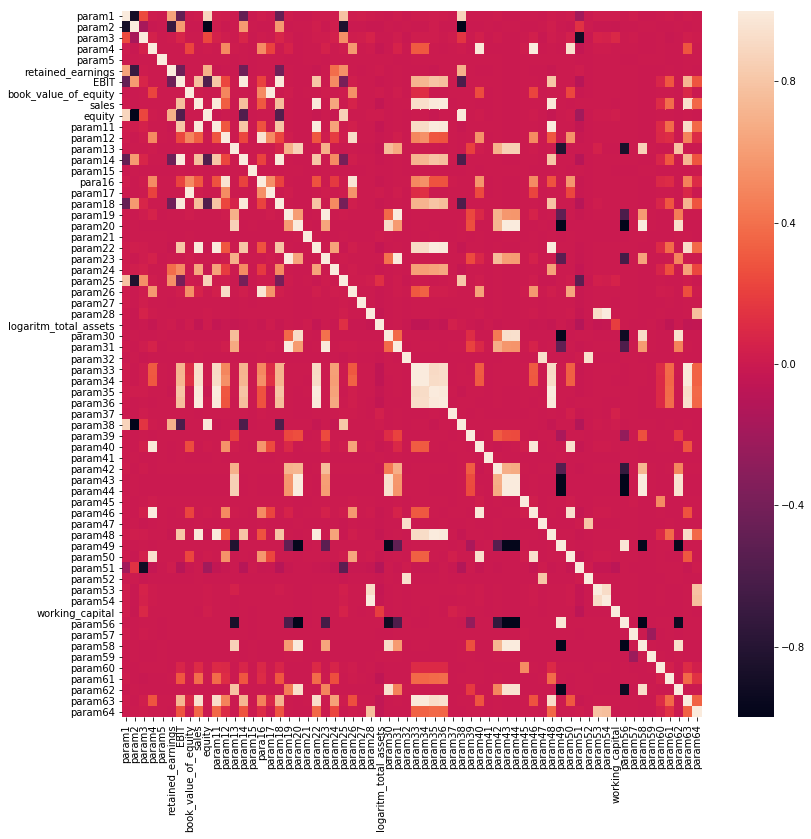

In [0]:
plt.subplots(figsize=(13,13))
sb.heatmap(data[data.columns.tolist()[:-1]].corr(),xticklabels=True, yticklabels=True, vmin=-1, vmax=1)
plt.show()

In [0]:
data = data.dropna()
data_y = data[data.columns.tolist()[-1]]
data_x = data[data.columns.tolist()[:-1]]
data_x = (data_x - data_x.mean()) / (data_x.std())

In [0]:
pca = PCA(n_components=0.9, svd_solver='full')
pca.fit(data_x)
data_pca_x = pca.fit_transform(data_x)
print(data_pca_x.shape)
for v in np.absolute(pca.components_):
    print(np.argmax(v))

(19967, 23)
13
48
62
55
27
45
35
51
55
58
59
34
2
12
23
36
36
4
40
14
14
26
54


In [0]:
pca_sum = np.sum(np.absolute(pca.components_), axis=0)
print(pca_sum.shape, pca_sum)
sorted_pca_sum = sorted(pca_sum, reverse=True)
print(sorted_pca_sum)
for v in sorted_pca_sum[:5]:
  print(np.where(pca_sum == v)[0][0] + 1)

(64,) [1.02954595 0.82764084 1.71009241 1.31990295 2.11597553 1.18675774
 0.65133177 1.5497216  1.47913872 0.85861213 1.16456365 1.3505591
 1.95411193 0.65097045 2.09787209 1.45419364 1.5630445  0.80005132
 1.02080499 1.17416658 2.3625272  1.14481599 1.01256786 1.97608711
 1.14670226 1.45989933 2.33607909 0.82317627 1.76334995 1.11916522
 0.98999869 1.04520103 1.7440721  1.50069582 1.25744501 1.25103652
 2.3901564  0.82446077 0.96558774 1.51410291 1.33512613 1.28391393
 1.1612949  1.23020567 1.08320239 1.41343793 0.73376032 1.21270923
 1.05742373 1.50149912 1.92761276 1.04492458 0.94769982 0.82291893
 2.36863089 1.23624173 1.11666862 1.23635796 1.11574228 1.06414674
 2.35044217 1.22658155 1.5651924  0.79901618]
[2.3901563957893455, 2.368630887394585, 2.3625271954196956, 2.350442166933922, 2.3360790861978824, 2.1159755318986595, 2.0978720858486875, 1.976087112443429, 1.954111929752354, 1.9276127644562704, 1.7633499526289844, 1.7440720972773496, 1.7100924101414514, 1.5651924006528937, 1.

In [0]:
year1_notna = year1.dropna()
print("Con cero: ",year1_notna[year1_notna.label == 0].shape[0])
print("Con uno: ",year1_notna[year1_notna.label == 1].shape[0])
print("Con cero: ",year1[year1.label == 0].shape[0])
print("Con uno: ",year1[year1.label == 1].shape[0])

Con cero:  3164
Con uno:  30
Con cero:  6756
Con uno:  271


In [0]:
print(year1.isnull().sum())

param1                      3
param2                      3
param3                      3
param4                     30
param5                      8
retained_earnings           3
EBIT                        3
book_value_of_equity       25
sales                       1
equity                      3
param11                    39
param12                    30
param13                     0
param14                     3
param15                     2
para16                     25
param17                    25
param18                     3
param19                     0
param20                     0
param21                  1622
param22                     3
param23                     0
param24                   124
param25                     3
param26                    25
param27                   311
param28                    34
logaritm_total_assets       3
param30                     0
                         ... 
param36                     3
param37                  2740
param38   

In [0]:
year1dropped = year1.drop(columns=['param21', 'param27', 'param37'])
year1dropped_na = year1dropped.dropna()

print("Con cero: ",year1dropped_na[year1dropped_na.label == 0].shape[0])
print("Con uno: ",year1dropped_na[year1dropped_na.label == 1].shape[0])

Con cero:  6361
Con uno:  218


In [0]:
print(year2.isnull().sum())
# param21*, param24, param27*, param28, param37*, param41, param45, param53, param54, param60, param64

In [0]:
year2dropped = year2.drop(columns=['param21', 'param27', 'param37', 'param24', 'param28', 'param41', 'param45', 'param53', 'param54', 'param60', 'param64'])
year2dropped_na = year2dropped.dropna()

print("Con cero: ",year2[year2.label == 0].shape[0])
print("Con uno: ",year2[year2.label == 1].shape[0])

print("Con cero: ",year2dropped_na[year2dropped_na.label == 0].shape[0])
print("Con uno: ",year2dropped_na[year2dropped_na.label == 1].shape[0])

Con cero:  9773
Con uno:  400
Con cero:  9611
Con uno:  390
